# Example Usage for YoloPose

## Load Model

In [1]:
%reset -f
import cv2
import matplotlib.pyplot as plt
from util.YoloModel import YoloPose

yolo_model = YoloPose(r"models\yolo11n-pose.pt")
print(f"Training imgsz: {yolo_model.training_imgsz}")

Warming up the model...
Warm-up complete.
Training imgsz: 640


## Single Inference

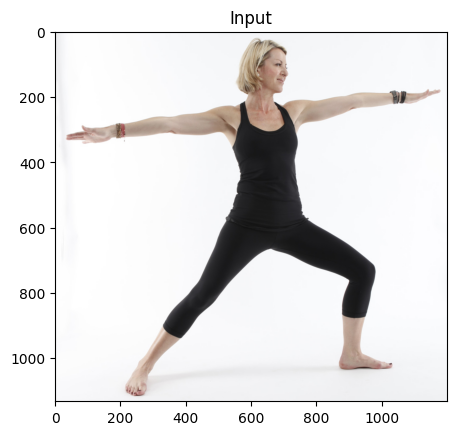

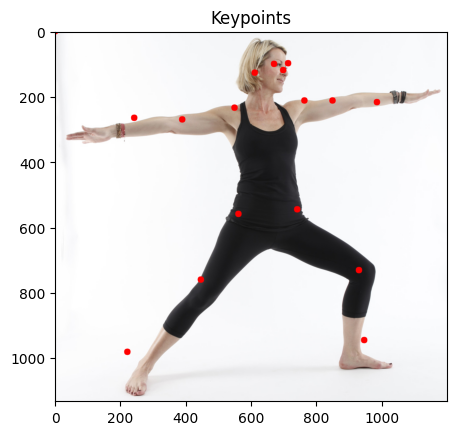

In [ ]:
image = cv2.imread(r"images\pose\person1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_bbox = image.copy()

plt.imshow(image)
plt.title(f"Input")
plt.show()

results = yolo_model.predict(image)

for box, keypoints_list, score, cls_name in yolo_model.decode_results(results):

    for keypoint in keypoints_list:
        cv2.circle(image_with_bbox, keypoint, 10, (255,0,0), -1)

    plt.imshow(image_with_bbox)
    plt.title("Keypoints")
    plt.show()


## Batch Inference

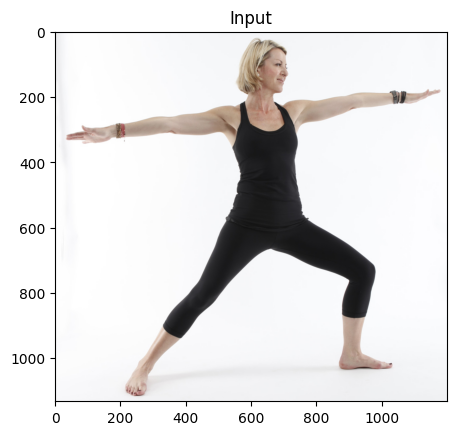

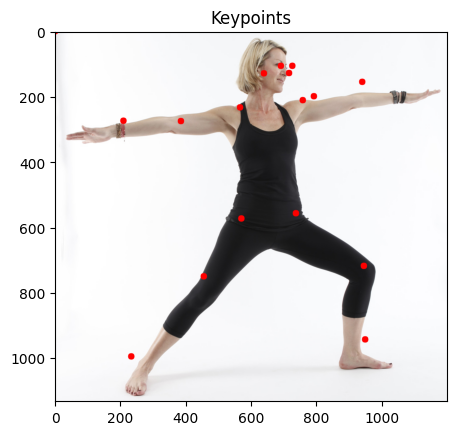

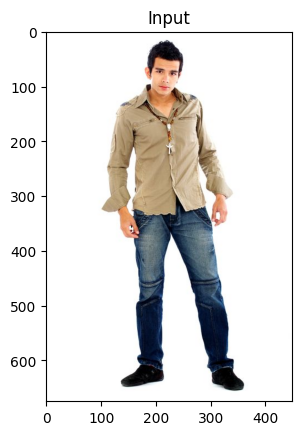

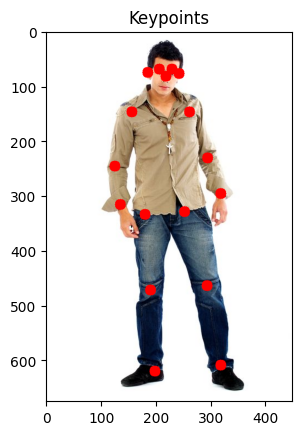

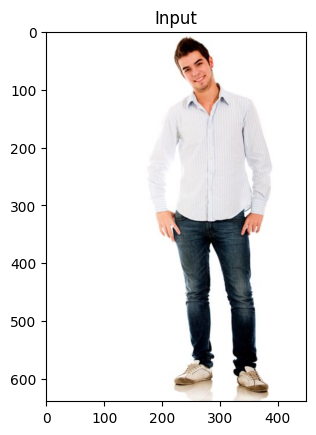

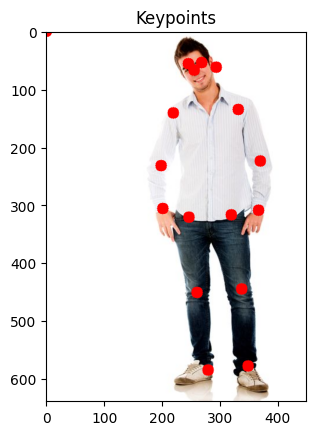

In [3]:
image_list = [
    cv2.imread(r"images\pose\person1.jpg"),
    cv2.imread(r"images\pose\person2.jpg"),
    cv2.imread(r"images\pose\person3.jpg"),
]

results = yolo_model.predict(image_list)
decode_results = yolo_model.decode_results(results)

for image, objects in zip(image_list, decode_results):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_with_bbox = image.copy()
    
    plt.imshow(image)
    plt.title(f"Input")
    plt.show()

    for box, keypoints_list, score, cls_name in objects:
        
        for keypoint in keypoints_list:
            cv2.circle(image_with_bbox, keypoint, 10, (255,0,0), -1)

        plt.imshow(image_with_bbox)
        plt.title("Keypoints")
        plt.show()


    print("=" * 20)